In [1]:
# MOONS

In [2]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

import torch
from torch import nn
from torch import optim

# Para instalar la libreria en el Colab
!pip install nflows

from nflows.flows.base import Flow
from nflows.distributions.normal import StandardNormal
from nflows.transforms.base import CompositeTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import ReversePermutation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 841.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nflows: filename=nflows-0.14-py3-none-any.whl size=53653 sha256=a600b3f96e05bddfa8bce2af79477310f6f39b88b952935c16fdfc18b6329805
  Stored in directory: /root/.cache/pip/wheels/ca/8f/ac/c324eb57b461632081812c33b13161878290d0e6fbb8f5a7e2
Successfully built nflows


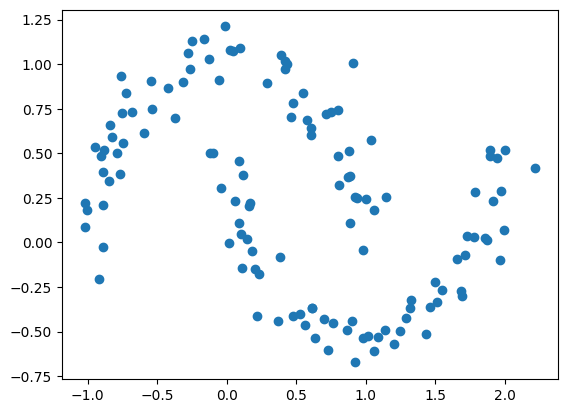

In [3]:
x, y = datasets.make_moons(128, noise=.1)
plt.scatter(x[:, 0], x[:, 1]);


In [4]:
num_layers = 5
base_dist = StandardNormal(shape=[2])

transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=2))
    transforms.append(MaskedAffineAutoregressiveTransform(features=2,
                                                          hidden_features=4))
transform = CompositeTransform(transforms)

flow = Flow(transform, base_dist)
optimizer = optim.Adam(flow.parameters())



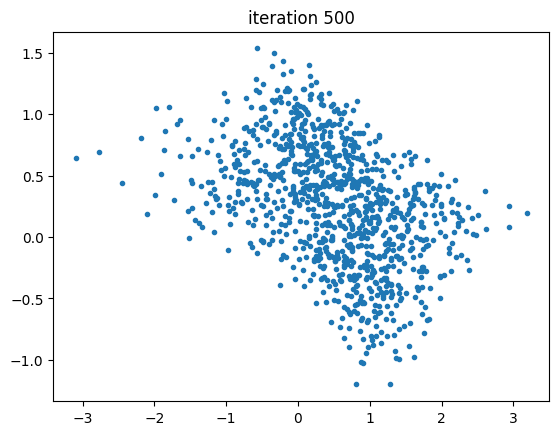

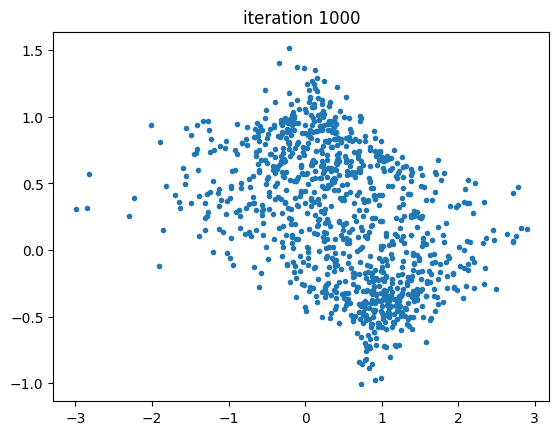

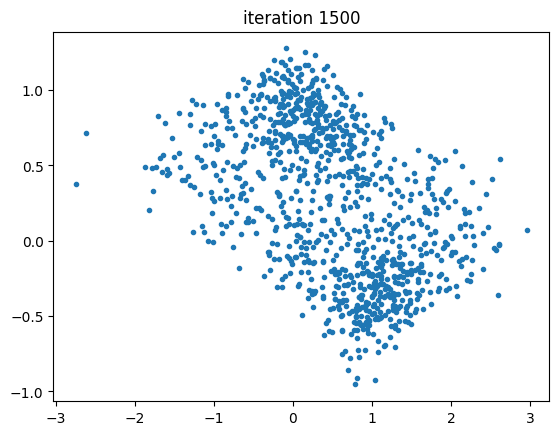

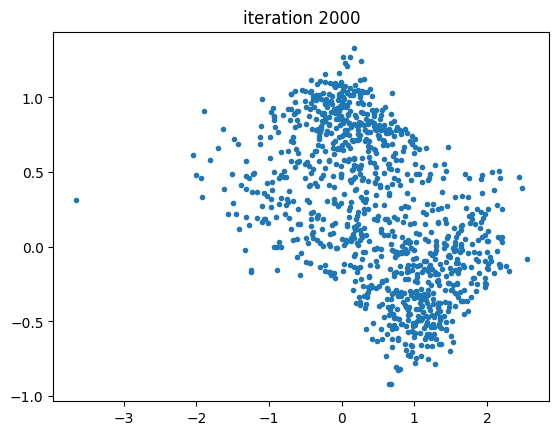

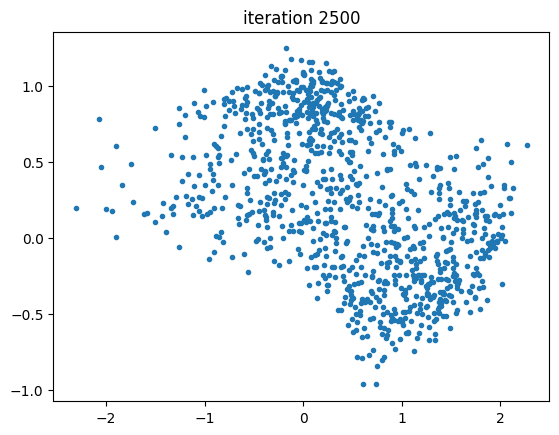

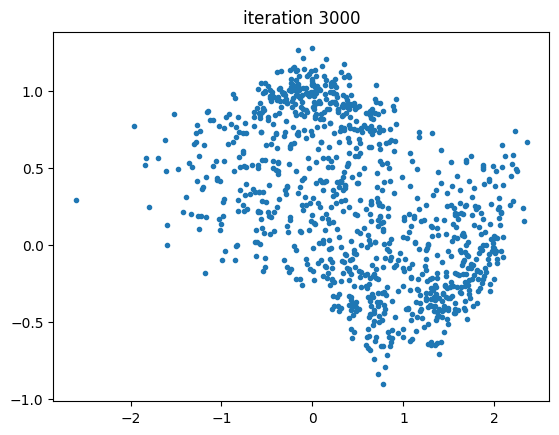

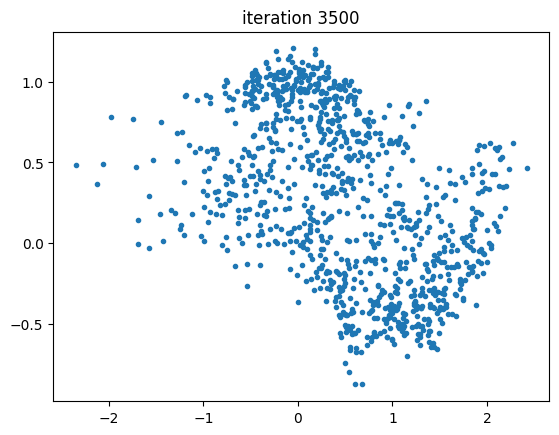

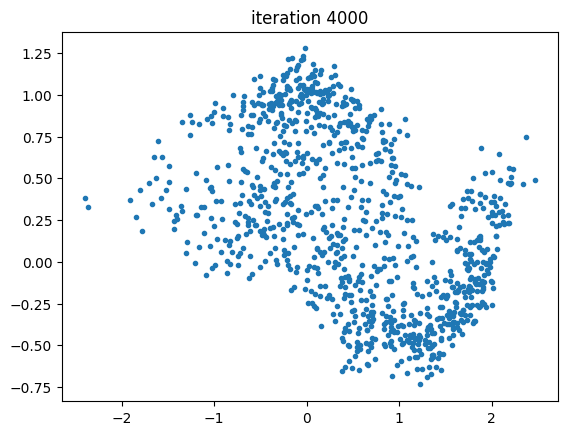

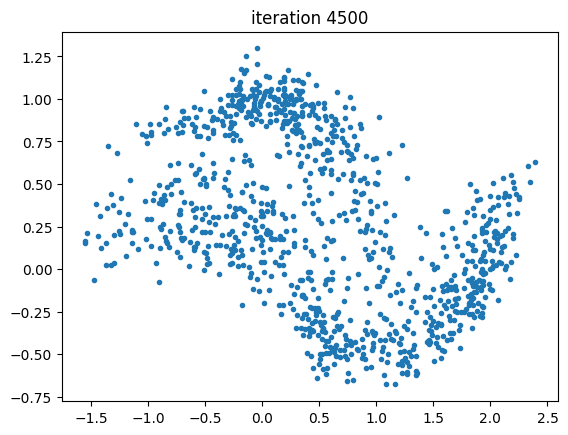

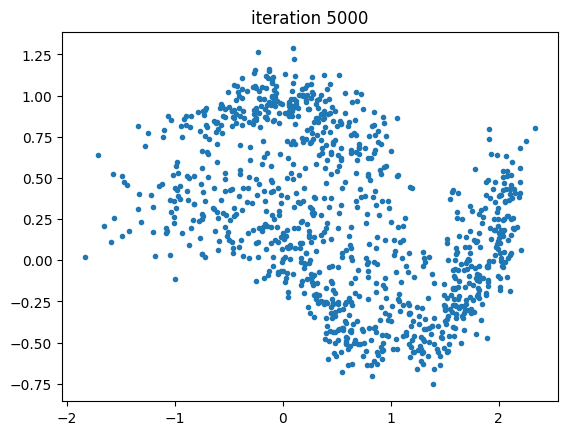

In [5]:
num_iter = 5000
for i in range(num_iter):
    x, y = datasets.make_moons(128, noise=.1)
    #x[:,1] = y[:, ]
    x = torch.tensor(x, dtype=torch.float32)
    optimizer.zero_grad()
    loss = -flow.log_prob(inputs=x).mean()
    loss.backward()
    optimizer.step()

    if (i + 1) % 500 == 0:
        #xline = torch.linspace(-1.5, 2.5)
        #yline = torch.linspace(-.75, 1.25)
        #xgrid, ygrid = torch.meshgrid(xline, yline)
        #xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

        #with torch.no_grad():
        #    zgrid = flow.log_prob(xyinput).exp().reshape(100, 100)

        #plt.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy())

        y = flow.sample(1000)
        yy = y.detach().numpy()
        plt.plot(yy[:,0],yy[:,1],'.')
        plt.title('iteration {}'.format(i + 1))
        plt.show()

In [6]:
num_iter = 50000
for i in range(num_iter):
    x, y = datasets.make_moons(128, noise=.1)
    #x[:,1] = y[:, ]
    x = torch.tensor(x, dtype=torch.float32)
    optimizer.zero_grad()
    loss = -flow.log_prob(inputs=x).mean()
    loss.backward()
    optimizer.step()

    if (i + 1) % 500 == 0:
        print(i)

499
999
1499
1999
2499
2999
3499
3999
4499
4999
5499
5999
6499
6999
7499
7999
8499
8999
9499
9999
10499
10999
11499
11999
12499
12999
13499
13999
14499
14999
15499
15999
16499
16999
17499
17999
18499
18999
19499
19999
20499
20999
21499
21999
22499
22999
23499
23999
24499
24999
25499
25999
26499
26999
27499
27999
28499
28999
29499
29999
30499
30999
31499
31999
32499
32999
33499
33999
34499
34999
35499
35999
36499
36999
37499
37999
38499
38999
39499
39999
40499
40999
41499
41999
42499
42999
43499
43999
44499
44999
45499
45999
46499
46999
47499
47999
48499
48999
49499
49999


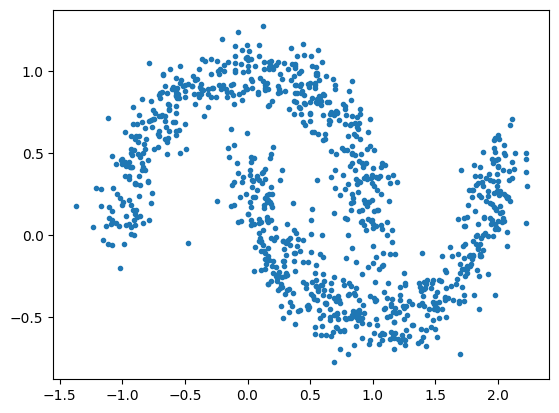

In [7]:
y = flow.sample(1000)
yy = y.detach().numpy()
plt.plot(yy[:,0],yy[:,1],'.')

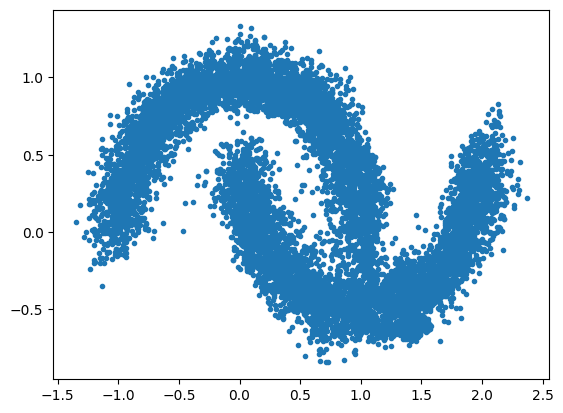

In [8]:
y = flow.sample(10000)
yy = y.detach().numpy()
plt.plot(yy[:,0],yy[:,1],'.')